In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1. **EDA of the dataset**

### 1.1 Import libraries

In [4]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
import gc
import pprint

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### 1.2 Reading data

#### **1.2.2 Reading data in chunks**

In [5]:
TRAIN_DATA_PATH = "../input/amex-default-prediction/train_data.csv"
chunksize = 13000
df_train_raw_chunks = pd.read_csv(TRAIN_DATA_PATH, chunksize=chunksize)

In [6]:
df_train_raw_ch = df_train_raw_chunks.__next__()
df_train_raw_ch.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.004838,NaN,0.

In [7]:
sample_customer_id = np.random.choice(df_train_raw_ch['customer_ID'])
customer_data_ex = df_train_raw_ch[df_train_raw_ch["customer_ID"] == sample_customer_id]
customer_data_ex.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
12970,009be36f1d40427c1f1604f0d9603e1ec093170af5b367...,2017-03-27,0.943058,0.357397,0.055225,1.001799,0.000858,0.075700,0.000133,0.002263,0.007835,0.034311,0.003843,0.073447,0.008411,0.045607,0.002072,0.449934,0.484646,0.060557,NaN,0.229131,0.045059,1.001662,NaN,0.339984,0.072976,0.100550,0.219278,0.657046,0.293831,NaN,0.167025,0.048553,0.003080,1.004272,0.004475,0.058768,0.040817,0.853154,0.064713,0.149261,0.053986,0.006798,0.004336,0.047796,0.052706,0.403132,0.481173,0.083475,0.001502,0.367726,0.273387,CO,O,0.000910,0.085277,NaN,1.003506,0.008288,NaN,0.006281,6.0,0.169003,0.008881,0.423594,0.009093,0.001051,0.000030,0.007206,0.002878,0.009182,0.106611,0.033171,NaN,0.953735,0.005454,0.008151,0.096568,0.009381,0.000500,0.255405,0.092603,0.006805,0.001925,0.002013,0.005569,NaN,0.000941,0.208905,0.003152,0.005109,0.007266,0.007297,NaN,0.000883,1.005483,0.057078,0.002118,0.001266,0.003392,0.007790,0.006943,0.007535,NaN,0.0,0.005859,0.009564,NaN,0.000543,0.004022,NaN,1,0.004891,0.009276,0.004438,0.003255,0.006276,0.001928,1.006279,0.004786,0.005227,0.007963,0.006408,0.008062,0.000914,0.000792,0.000817,0.008828,0.000775,0.948212,0.131470,0.959549,0.970316,0.003695,0.994019,1.009752,1.002593,0.844502,NaN,0.337830,0.001825,0.063490,NaN,1.009775,2.0,NaN,0.006567,NaN,NaN,NaN,1.007497,0.033505,0.357322,0.002037,1.0,0.206684,0.0,-1.0,0.646117,0.640337,0.0,0.675765,0.146543,0.009284,0.182930,0.002158,1.0,0.007019,0.999022,0.005088,0.003241,NaN,0.005049,0.002446,NaN,0.008537,0.001503,NaN,NaN,NaN,NaN,NaN,0.004366,0.009854,0.001940,NaN,0.005369,0.007523,0.000293
12971,009be36f1d40427c1f1604f0d9603e1ec093170af5b367...,2017-04-15,0.939924,0.001055,0.018069,1.006173,0.007001,0.083781,0.001743,0.007170,0.006565,0.037513,0.008732,0.057011,0.012623,0.127457,0.007822,0.452811,0.487275,0.066055,NaN,0.211293,0.025809,1.009020,NaN,0.341345,0.020236,0.104919,0.219114,0.654526,0.296848,NaN,0.093608,0.011581,0.004656,1.006841,0.002880,0.057049,0.044071,0.600635,0.066326,0.148146,0.052293,0.003181,0.008733,0.047681,0.014833,0.384690,0.134396,0.062495,0.008874,0.047957,0.276510,CO,O,0.005462,0.085230,NaN,1.001915,0.002613,NaN,0.006560,6.0,0.186334,0.006496,0.288077,0.001485,0.006970,0.003447,0.003809,0.008576,0.007149,0.200007,0.017728,NaN,0.953761,0.007218,0.001172,0.102174,0.006119,0.006399,0.260693,0.020398,0.009285,0.003581,0.005514,0.002016,NaN,0.007869,0.009503,0.006943,0.000385,0.008027,0.006905,NaN,0.009326,1.001129,0.040366,0.005781,0.003546,0.001409,0.004537,0.002092,0.003123,NaN,0.0,0.003024,0.005702,NaN,0.001125,0.003569,NaN,1,0.001944,0.008845,0.001438,0.007225,0.002751,0.006730,1.002035,0.003789,0.002935,0.008571,0.006692,0.008432,0.005418,0.002765,0.009698,0.003192,0.004081,0.947949,0.136160,0.952255,0.978266,0.013382,1.025615,1.008628,1.006644,0.848396,NaN,0.338651,0.000640,0.014147,NaN,1.009074,2.0,NaN,0.005283,NaN,NaN,NaN,0.021401,0.029284,0.438121,0.002464,1.0,0.215541,0.0,-1.0,0.648707,0.646741,0.0,0.681572,0.287880,0.008956,0.189869,0.008618,1.0,0.007219,0.999759,0.008767,0.00509

In [14]:
del df_train_raw_chunks, df_train_raw_ch, customer_data_ex, sample_customer_id
gc.collect()

23

Because this method desn't allow you to explore the entire distribution of data and thus the second option is preffered. So I will use the compressed data to train the model.

#### **1.2.1 Reading the compressed dataset**

In [8]:
import pickle, gc
from matplotlib import pyplot as plt

In [9]:
import numpy as np
import pandas as pd
from pathlib import Path

input_path = Path('/kaggle/input/amex-default-prediction/')

In [10]:
train_labels = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv')
train_labels.head(2)

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0


In [11]:
# Know the dataset statistic structure and the original data composition
label_comp = pd.DataFrame({'absolute': train_labels.target.value_counts(),
              'percentile': train_labels.target.value_counts() / len(train_labels)})
label_comp['original data'] =  label_comp.absolute * np.array([20, 1])
label_comp['original percentile'] = label_comp['original data'] / label_comp['original data'].sum()
label_comp

,absolute,percentile,original data,original percentile
0,340085,0.741066,6801700,0.98283
1,118828,0.258934,118828,0.01717


The over all oringinal dataset has over 50 GB size,which is very unlikely to fit in the computer. Thanks to @munumbutt's AMEX-Feather-Dataset. He/She  transfer the floating point precision from 64 bit to 16 bit.

In [13]:
%%time
train = pd.read_feather('../input/amexfeather/train_data.ftr')
test = pd.read_feather('../input/amexfeather/test_data.ftr')
with pd.option_context("display.min_rows", 6):
    display(train)
    display(test)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,NaN,0.000630,0.080994,0.708984,0.170654,0.006203,0.358643,0.525391,0.255615,NaN,0.063904,0.059418,0.006466,0.148682,1.335938,0.008209,0.001423,0.207275,0.736328,0.096191,NaN,0.023376,0.002768,0.008324,1.001953,0.008301,0.161377,0.148315,0.922852,0.354492,0.151978,0.118103,0.001882,0.158569,0.065735,0.018387,0.063660,0.199585,0.308350,0.016357,0.401611,0.091064,CR,O,0.007126,0.007664,NaN,0.652832,0.008522,NaN,0.004730,6.0,0.271973,0.008362,0.515137,0.002644,0.009010,0.004807,0.008339,0.119385,0.004803,0.108276,0.050873,NaN,0.007553,0.080444,0.069092,NaN,0.004326,0.007561,NaN,0.007729,0.000272,0.001575,0.004238,0.001434,NaN,0.002272,0.004059,0.007122,0.002457,0.002310,0.003532,0.506836,0.008034,1.009766,0.084656,0.003820,0.007042,0.000438,0.006451,0.000830,0.005054,NaN,0.0,0.005722,0.007084,NaN,0.000198,0.008911,NaN,1.0,0.002537,0.005177,0.006626,0.009705,0.007782,0.002449,1.000977,0.002665,0.007481,0.006893,1.503906,1.005859,0.003569,0.008873,0.003948,0.003647,0.004951,0.894043,0.135620,0.911133,0.974609,0.001244,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,0.009972,0.004570,NaN,1.008789,2.0,NaN,0.004326,NaN,NaN,NaN,1.007812,0.210083,0.676758,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.006805,NaN,0.002052,0.005970,NaN,0.004345,0.001534,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,NaN,0.002525,0.069397,0.712891,0.113220,0.006207,0.353516,0.521484,0.223389,NaN,0.065247,0.057739,0.001614,0.149780,1.339844,0.008369,0.001984,0.202759,0.720703,0.099792,NaN,0.030594,0.002748,0.002481,1.008789,0.005135,0.140991,0.143555,0.919434,0.326660,0.156250,0.118713,0.001610,0.148438,0.093933,0.013039,0.065491,0.151367,0.265137,0.017685,0.406250,0.086792,CR,O,0.002413,0.007149,NaN,0.646973,0.002237,NaN,0.003880,6.0,0.188965,0.004028,0.509277,0.004192,0.007843,0.001283,0.006523,0.140625,0.000094,0.101013,0.040466,NaN,0.004833,0.081421,0.074158,NaN,0.004204,0.005302,NaN,0.001864,0.000978,0.009895,0.007599,0.000509,NaN,0.009811,0.000126,0.005966,0.000395,0.001327,0.007774,0.500977,0.000761,1.009766,0.081848,0.000347,0.007790,0.004311,0.002333,0.009468,0.003754,NaN,0.0,0.007584,0.006676,NaN,0.001143,0.005905,NaN,1.0,0.008430,0.008980,0.001854,0.009926,0.005989,0.002247,1.006836,0.002508,0.006828,0.002836,1.503906,1.005859,0.000571,0.000391,0.008354,0.008850,0.003180,0.902344,0.136353,0.919922,0.975586,0.004562,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,0.003922,0.004654,NaN,1.002930,2.0,NaN,0.008705,NaN,NaN,NaN,1.007812,0.184082,0.822266,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.004406,NaN,0.001034,0.

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631348,0.001912,0.010727,0.814453,0.007545,0.168701,0.009972,0.002348,0.113159,NaN,0.007584,0.116394,0.004482,0.009514,0.005177,NaN,0.474365,0.626465,NaN,0.174561,1.250977,1.003906,NaN,0.008720,0.001013,0.103577,0.119019,NaN,-0.002918,NaN,0.002771,0.004417,1.006836,1.004883,0.002810,0.105591,0.119202,0.321777,0.114563,NaN,NaN,0.003420,0.205933,NaN,0.010185,NaN,0.027466,0.588867,0.010490,1.881836,0.051819,CR,,0.008293,0.008667,NaN,0.592285,0.009148,NaN,0.004986,NaN,0.190552,0.002676,0.409424,0.009987,NaN,0.005211,NaN,0.014687,0.004311,0.400635,1.134766,0.178833,0.959473,0.217651,0.204590,NaN,0.009796,0.007748,0.002916,0.006897,0.001657,0.004356,NaN,0.002008,NaN,0.002531,0.000348,0.001173,0.004169,0.004585,0.002291,0.508301,0.005093,1.002930,0.133789,0.004322,NaN,0.008858,0.004143,0.009560,0.006943,NaN,0.0,0.003683,0.009911,NaN,0.008911,0.002954,NaN,1.0,0.009003,0.003418,0.002201,0.003780,0.002949,0.004635,1.003906,0.006653,0.007473,0.000192,NaN,0.008759,0.000834,0.004391,0.004116,0.008446,0.009575,0.980957,0.134888,0.954590,0.971191,0.006561,0.002419,NaN,NaN,NaN,NaN,NaN,0.008148,0.007973,NaN,NaN,1.0,NaN,0.005123,NaN,NaN,NaN,1.003906,0.274170,0.004303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.006203,NaN,NaN,0.009666,NaN,NaN,NaN,NaN,0.007080,0.005959,NaN,NaN,NaN,NaN,NaN,NaN,0.004669,NaN,NaN,NaN,0.008278,NaN
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.586914,0.005276,0.011024,0.811035,0.001817,0.241333,0.000166,0.009132,0.123047,NaN,0.006645,0.134888,0.009499,0.026306,0.009026,NaN,0.473633,0.611816,NaN,0.177124,0.234131,1.009766,NaN,0.003145,0.005535,0.101257,0.120972,NaN,0.031219,NaN,0.006496,0.010002,1.005859,1.000000,0.000525,0.160522,0.121460,0.170776,0.184082,NaN,0.028351,0.007156,0.403320,0.014488,0.025131,NaN,0.054779,0.623047,0.021698,2.042969,0.057556,CR,,0.002012,0.000835,NaN,0.590820,0.000165,NaN,0.001556,NaN,0.190186,0.001771,0.561523,0.008125,NaN,0.008392,0.000606,0.011948,0.002283,0.605957,0.208374,0.179443,0.961426,0.216553,0.206543,NaN,0.004547,0.003098,NaN,0.003681,0.005516,0.001506,0.001014,0.006443,NaN,0.007168,0.003077,0.005878,0.004055,0.009636,0.001225,0.508789,0.007320,1.003906,0.144653,0.005299,NaN,0.001477,0.002083,0.002234,0.005524,NaN,0.0,0.006409,0.007458,NaN,0.000843,0.007458,NaN,1.0,0.005119,0.002382,0.006557,0.001691,0.004448,0.000575,1.004883,0.004395,0.001168,0.006695,NaN,0.004318,0.008072,0.007889,0.007656,0.006348,0.006950,0.966797,0.138550,0.957031,0.975098,0.004612,0.006550,0.003031,0.008759,NaN,NaN,0.004696,0.000078,0.015465,NaN,1.007812,1.0,NaN,0.000610,NaN,NaN,NaN,1.004883,0.353760,0.276611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.003834,0.008781,0.005577,0.007442,NaN,0.007599,0.008072,NaN,0.007187,0.001253,NaN,NaN,NaN,NaN,NaN,0.000142,0.004940,0.009018,NaN,0.003695,0.003754,0.001460
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.608887,0.003326,0.016388,1.004883,0.000114,0.267090,0.004196,0.004192,0.1

CPU times: user 21.2 s, sys: 21.5 s, total: 42.7 s
Wall time: 1min 3s


### 1.3 About the dataset
The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

D_* = Delinquency variables\
S_* = Spend variables\
P_* = Payment variables\
B_* = Balance variables\
R_* = Risk variables\
S_2: contains a timestamp\
with the following features being categorical:

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [14]:
train['S_2'] = pd.to_datetime(train['S_2'])

In [15]:
categorical_features = ['B_30', 'B_38', 'D_63', 'D_64', 'D_66', 'D_68', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']
train[categorical_features] = train[categorical_features].astype("category")
train[categorical_features].dtypes

B_30     category
B_38     category
D_63     category
D_64     category
D_66     category
D_68     category
D_114    category
D_116    category
D_117    category
D_120    category
D_126    category
dtype: object

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 191 entries, customer_ID to target
dtypes: category(11), datetime64[ns](1), float16(177), int64(1), object(1)
memory usage: 2.0+ GB


### 1.3 Missing data

In [17]:
missing_percentile = train.isna().sum().div(len(train)).mul(100).sort_values(ascending=False)
missing_percentile

D_87      99.930127
D_88      99.891457
D_108     99.476846
D_111     99.433530
D_110     99.433530
            ...    
D_75       0.000000
P_4        0.000000
B_23       0.000000
S_15       0.000000
target     0.000000
Length: 191, dtype: float64

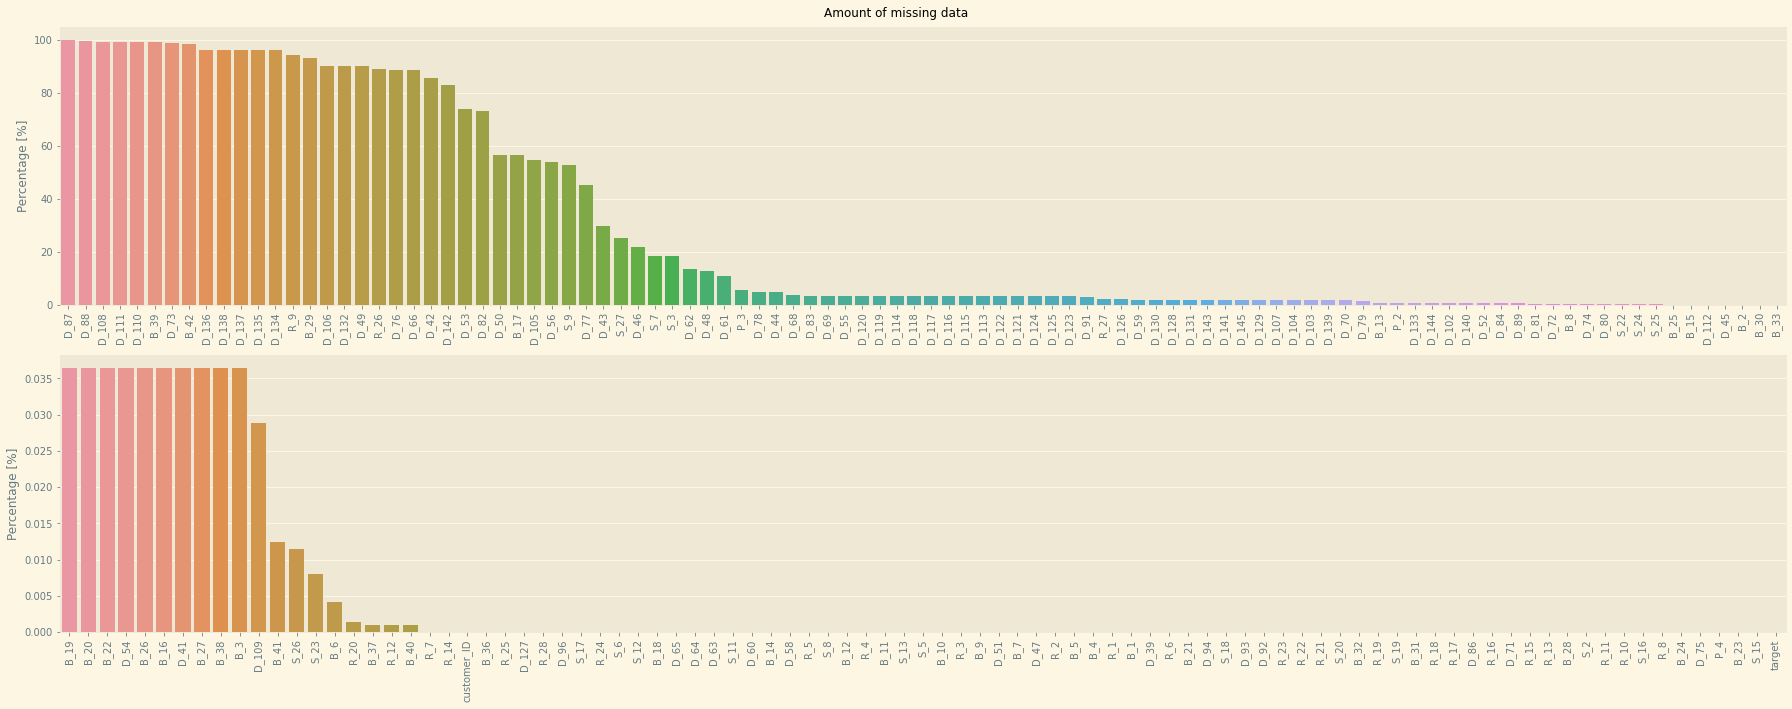

In [31]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(2,1, figsize=(25,10))
sns.barplot(x=missing_percentile[:100].index, y=missing_percentile[:100].values, ax=ax[0])
sns.barplot(x=missing_percentile[100:].index, y=missing_percentile[100:].values, ax=ax[1])
ax[0].set_ylabel("Percentage [%]"), ax[1].set_ylabel("Percentage [%]")
ax[0].tick_params(axis='x', rotation=90); ax[1].tick_params(axis='x', rotation=90)
plt.suptitle("Amount of missing data")
plt.tight_layout()
plt.show()

### 1.4 DIstribution of the target variable

In [18]:
target_percentile = train['target'].value_counts().div(len(train)).mul(100)

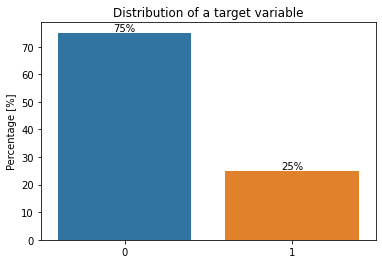

In [19]:
ax = sns.barplot(x=target_percentile.index, y=target_percentile.values)
ax.bar_label(ax.containers[0], fmt='%.f%%')
plt.title("Distribution of a target variable")
plt.ylabel("Percentage [%]")
plt.show()

Unique customer number

In [20]:
train["customer_ID"].nunique()

458913

In [21]:
cust_presence = train.groupby(['customer_ID','target']).size().reset_index().rename(columns={0:'presence'})
cust_presence.head(10)

,customer_ID,target,presence
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,13
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,13
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,13
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,13
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,13
5,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,0,13
6,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,13
7,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,0,13
8,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1,13
9,00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e...,1,13


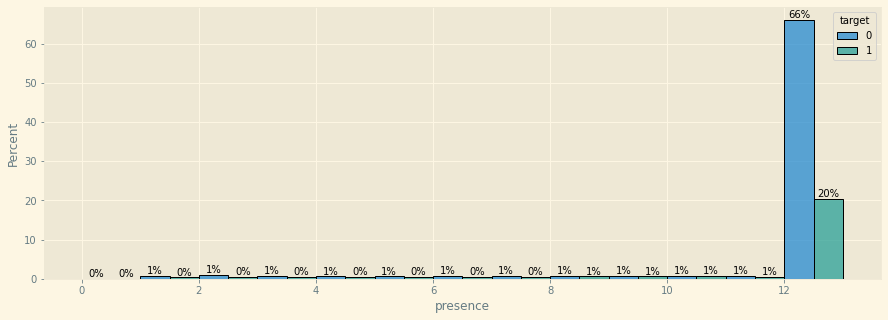

In [37]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.histplot(x='presence', data=cust_presence, hue='target', stat='percent', multiple="dodge", bins=np.arange(0,14), ax=ax)
ax.bar_label(ax.containers[0], fmt='%.f%%')
ax.bar_label(ax.containers[1], fmt='%.f%%')
plt.show()

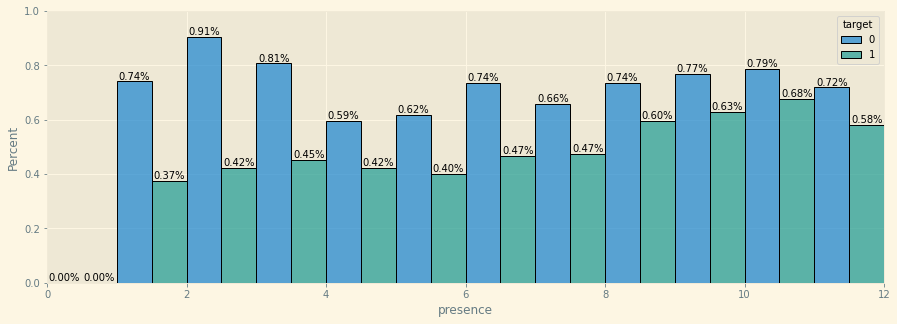

In [38]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.histplot(x='presence', data=cust_presence, hue='target', stat='percent', multiple="dodge", bins=np.arange(0,14), ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f%%')
ax.bar_label(ax.containers[1], fmt='%.2f%%')
ax.set_xlim(0,12)
ax.set_ylim(0,1)
plt.show()

In [22]:
short_customer_ids = list(cust_presence[cust_presence['presence']<13]['customer_ID'])
gc.collect()

77

In [23]:
short_customers = train[train['customer_ID'].isin(short_customer_ids)][['customer_ID','S_2']]
short_customers['month'] = short_customers['S_2'].dt.month
short_customers['year'] = short_customers['S_2'].dt.year
short_customers.groupby(['year','month']).size()

year  month
2017  3         9596
      4        15522
      5        14272
      6        24350
      7        29568
      8        35065
      9        39421
      10       44258
      11       48234
      12       52876
2018  1        60221
      2        66747
      3        72879
dtype: int64

In [24]:
len(short_customers)

513009

### 1.5 Correlations

In [42]:
def sample_full_cust(df, cust_ratio):
    n_customers = df['customer_ID'].nunique()
    no_of_cust = int(n_customers*cust_ratio)
    cust_ids = np.random.choice(df['customer_ID'].unique(), no_of_cust)
    print(f'Number of customers sampled: {no_of_cust}')
    ready_df = df[df['customer_ID'].isin(cust_ids)]
    print(f'Number of rows sampled: {len(ready_df)} ({round(len(ready_df)/len(df)*100)}%)')
    return ready_df

In [43]:
train_samples = sample_full_cust(train, 0.55)

Number of customers sampled: 252402
Number of rows sampled: 2342173 (42%)


In [44]:
correlations = train_samples.corr().abs()

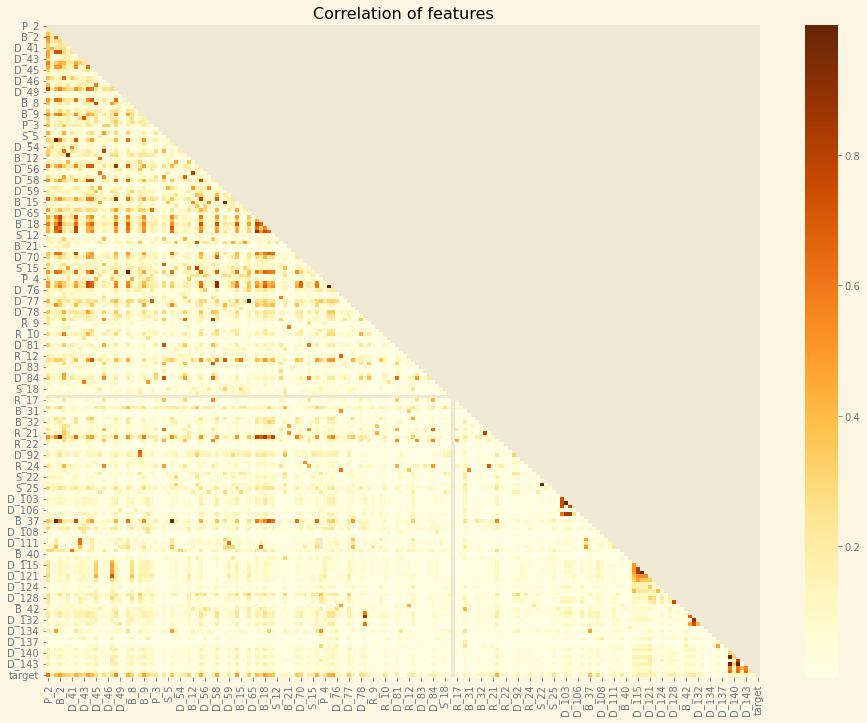

In [45]:
mask=np.triu(np.ones_like(correlations))

fig, ax = plt.subplots(1,1, figsize=(16,12))
sns.heatmap(correlations, ax=ax, mask=mask, cmap='YlOrBr')
ax.set_title("Correlation of features")
plt.show()

In [46]:
unstacked = correlations.unstack()
unstacked = unstacked.sort_values(ascending=False, kind="quicksort").drop_duplicates().head(25)
unstacked

P_2    P_2      1.000000
D_62   D_77     0.999783
D_103  D_104    0.999748
D_139  D_143    0.999527
       D_141    0.998158
D_143  D_141    0.997706
B_1    B_11     0.995412
B_23   B_7      0.995039
D_118  D_119    0.994890
B_1    B_37     0.992668
D_75   D_74     0.987648
B_37   B_11     0.987499
S_24   S_22     0.956964
D_75   D_58     0.925938
D_74   D_58     0.922581
B_14   B_15     0.913151
B_33   B_2      0.913066
S_7    S_3      0.903893
B_16   B_20     0.888619
D_131  D_132    0.880033
       D_79     0.869233
D_55   D_48     0.862689
B_33   B_18     0.853734
B_2    B_18     0.849949
D_107  D_103    0.846826
dtype: float64

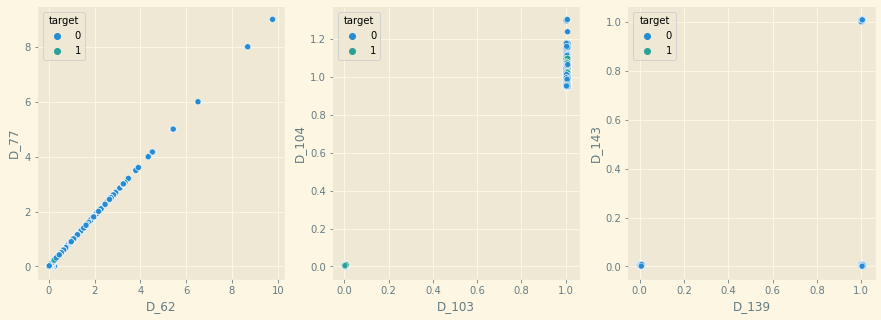

In [47]:
x1, y1 = unstacked.index[1]
x2, y2 = unstacked.index[2]
x3, y3 = unstacked.index[3]

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(x=x1, y=y1, data=train_samples, hue='target', ax=ax[0])
sns.scatterplot(x=x2, y=y2, data=train_samples, hue='target', ax=ax[1])
sns.scatterplot(x=x3, y=y3, data=train_samples, hue='target', ax=ax[2])
plt.show()

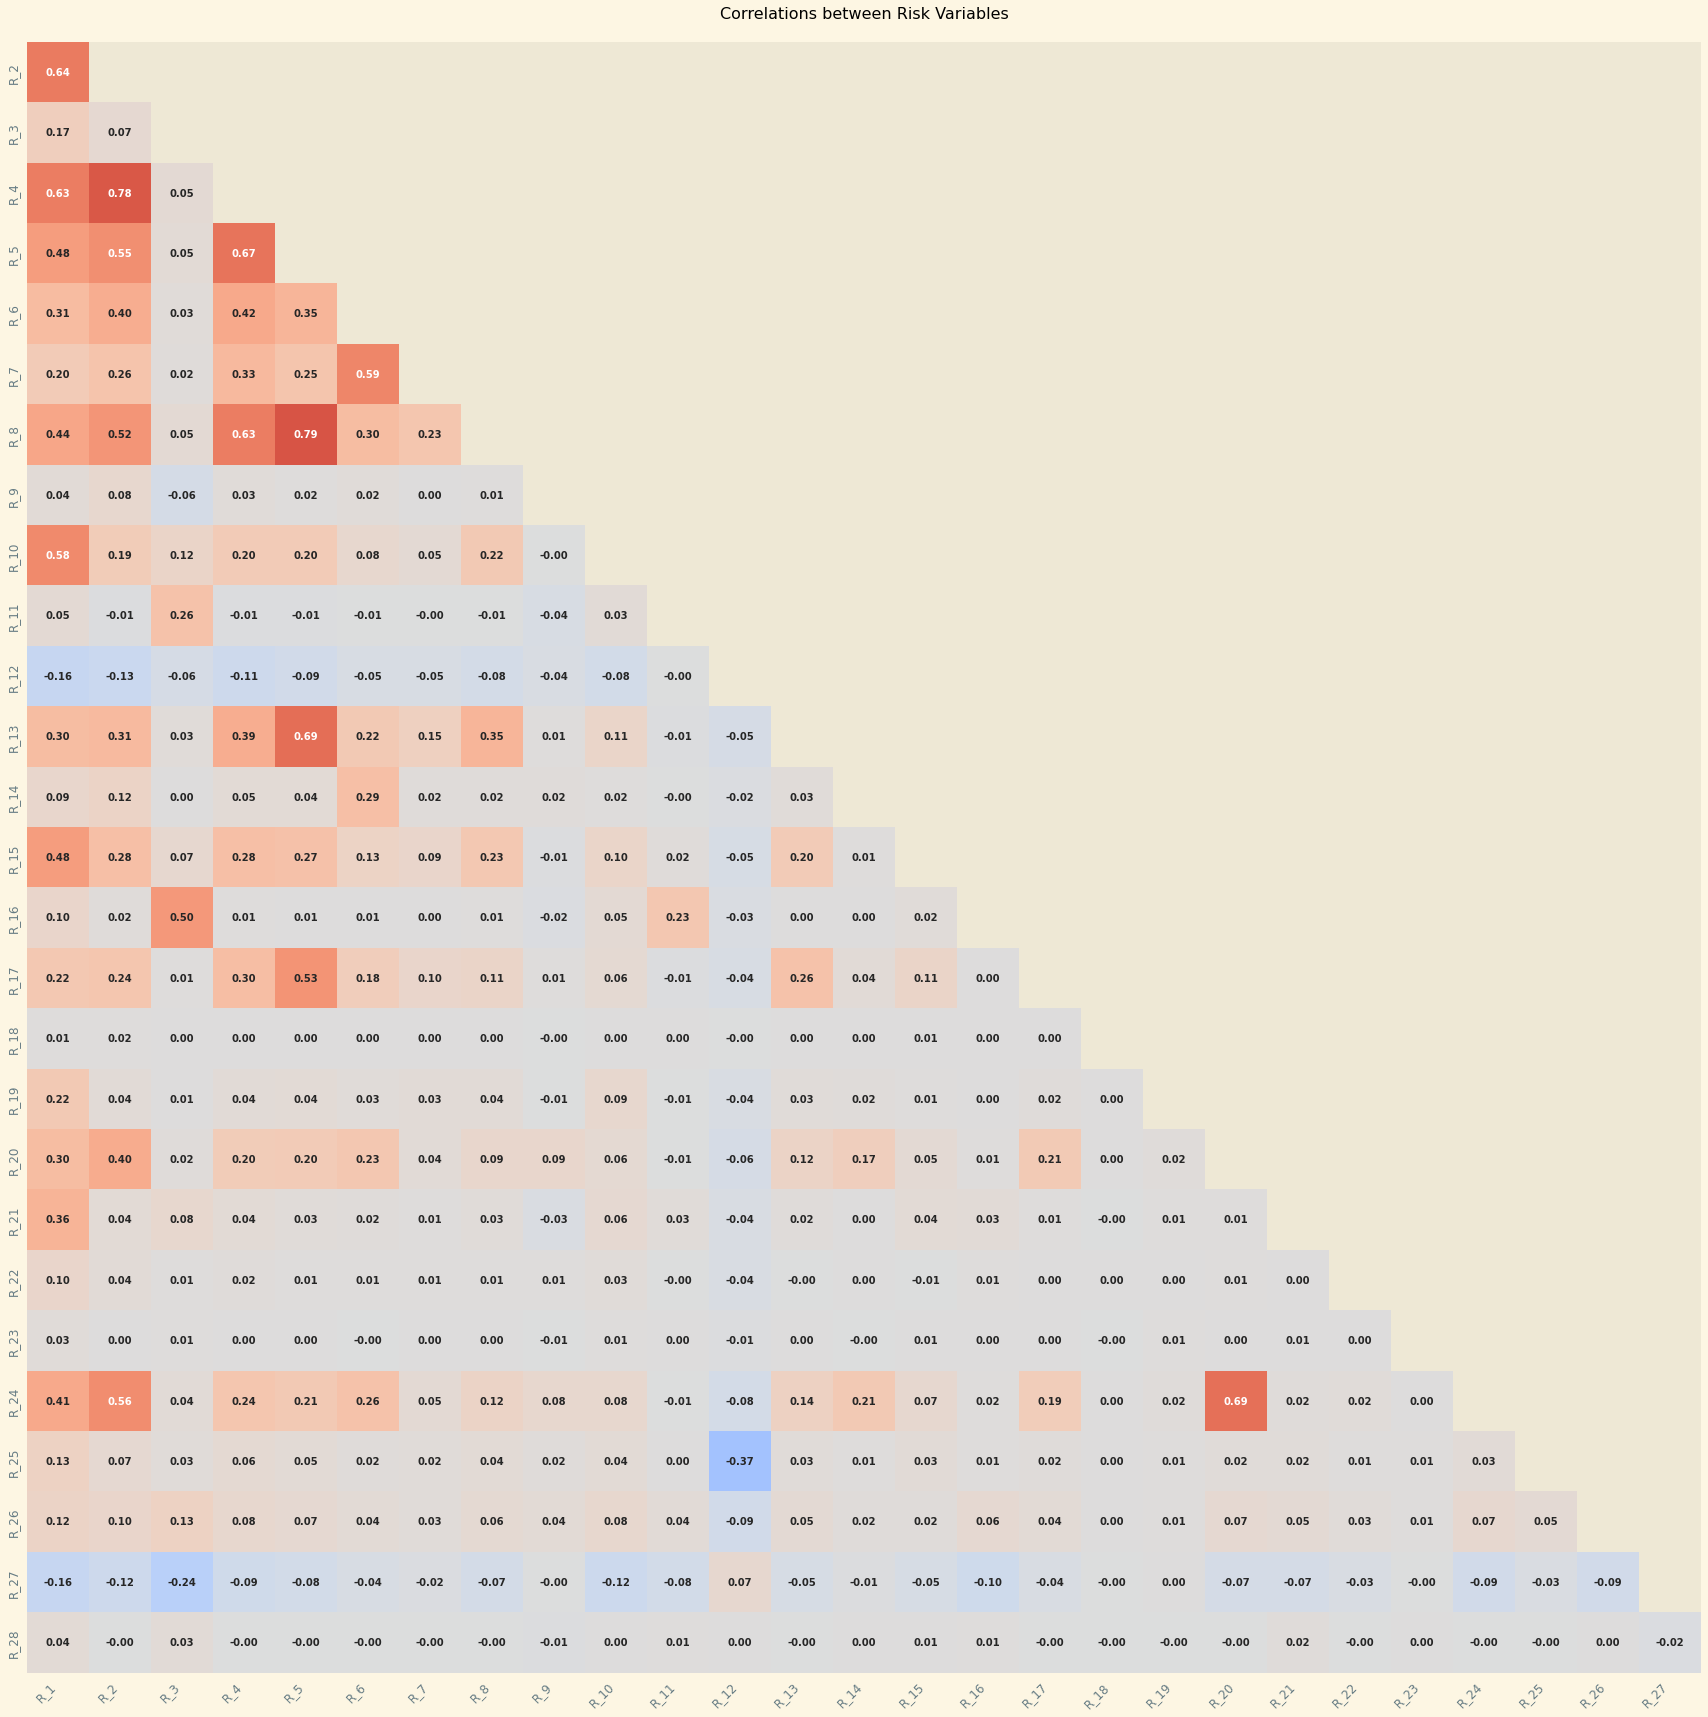

In [48]:
cols_to_show = [c for c in train_samples.columns if (c.startswith('R'))]
corr=train_samples[cols_to_show].corr()
mask=np.triu(np.ones_like(corr))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()

fig, ax = plt.subplots(figsize=(30,30))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':10,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlations between Risk Variables\n', fontsize=16)
plt.show()

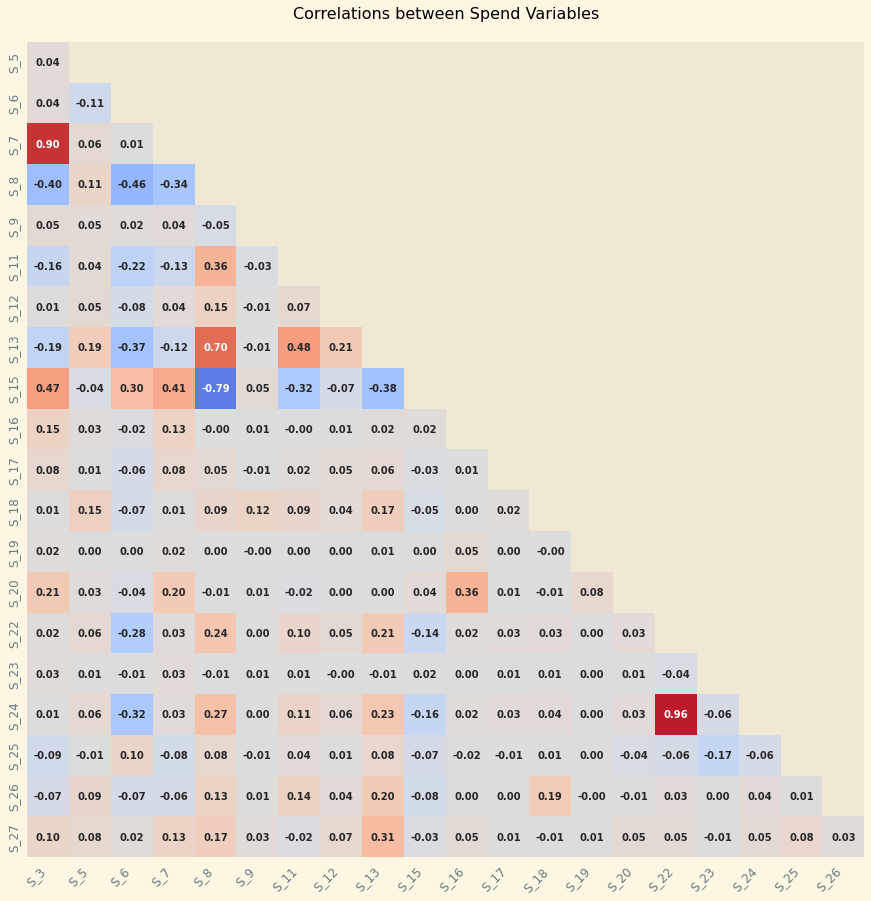

In [49]:
# code adapted from: https://www.kaggle.com/code/kellibelcher/amex-default-prediction-eda-lgbm-baseline
cols_to_show = [c for c in train_samples.columns if (c.startswith('S'))]
corr=train_samples[cols_to_show].corr()
mask=np.triu(np.ones_like(corr))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()

fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':10,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlations between Spend Variables\n', fontsize=16)
plt.show()

### 1.6 Categorical features

In [50]:
train[categorical_features].sample(10)

,B_30,B_38,D_63,D_64,D_66,D_68,D_114,D_116,D_117,D_120,D_126
1147209,0.0,3.0,CO,U,NaN,6.0,0.0,0.0,-1.0,0.0,1.0
4994231,0.0,2.0,CO,O,NaN,6.0,1.0,0.0,-1.0,0.0,1.0
4698049,0.0,3.0,CO,R,NaN,4.0,0.0,0.0,6.0,0.0,1.0
3557036,0.0,5.0,CO,R,NaN,5.0,0.0,0.0,-1.0,1.0,1.0
889028,0.0,2.0,CO,O,NaN,6.0,1.0,0.0,4.0,1.0,1.0
1520260,0.0,3.0,CO,U,NaN,6.0,0.0,0.0,4.0,0.0,1.0
5225322,0.0,2.0,CR,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4090954,0.0,3.0,CO,U,NaN,5.0,1.0,0.0,-1.0,0.0,1.0
4592249,0.0,1.0,CO,O,NaN,4.0,1.0,0.0,3.0,0.0,1.0
2541704,0.0,1.0,CO,O,NaN,6.0,1.0,0.0,2.0,0.0,1.0


In [51]:
for cf in categorical_features:
    print(cf, list(train[cf].unique()))

B_30 [0.0, 2.0, 1.0, nan]
B_38 [2.0, 1.0, 3.0, 5.0, 6.0, 7.0, 4.0, nan]
D_63 ['CR', 'CO', 'CL', 'XZ', 'XM', 'XL']
D_64 ['O', 'R', '', 'U', '-1']
D_66 [nan, 1.0, 0.0]
D_68 [6.0, 2.0, 3.0, nan, 5.0, 4.0, 0.0, 1.0]
D_114 [1.0, 0.0, nan]
D_116 [0.0, nan, 1.0]
D_117 [4.0, -1.0, 6.0, 2.0, 1.0, nan, 3.0, 5.0]
D_120 [0.0, 1.0, nan]
D_126 [1.0, nan, 0.0, -1.0]


In [52]:
train[categorical_features].isna().sum().div(len(train)).sort_values(ascending=False)

D_66     0.887307
D_68     0.039140
D_114    0.031947
D_116    0.031947
D_117    0.031947
D_120    0.031947
D_126    0.021119
B_30     0.000364
B_38     0.000364
D_63     0.000000
D_64     0.000000
dtype: float64

### 1.7 Distributions

In [53]:
def show_kdeplots(letter, figsize):   
    cols = [c for c in train_samples.columns if (c.startswith((letter,'t'))) & (c not in categorical_features)]
    df_tmp = train_samples[cols]
    plt_cols = 5
    plt_rows = math.ceil(len(cols)/plt_cols)

    fig, axes = plt.subplots(plt_rows, plt_cols, figsize=figsize)
    for i, ax in enumerate(axes.reshape(-1)):
        if i<len(cols)-1:
            sns.kdeplot(x=cols[i], hue='target', hue_order=[1,0], label=['Default','Paid'], data=df_tmp, 
                        fill=True, linewidth=2, legend=False, ax=ax)
        ax.tick_params(left=False, bottom=False, labelsize=5)
        ax.xaxis.get_label().set_fontsize(10)
        ax.set_ylabel('')

    sns.despine(bottom=True, trim=True)
    plt.tight_layout(rect=[0, 0.2, 1, 0.99])
    plt.show()

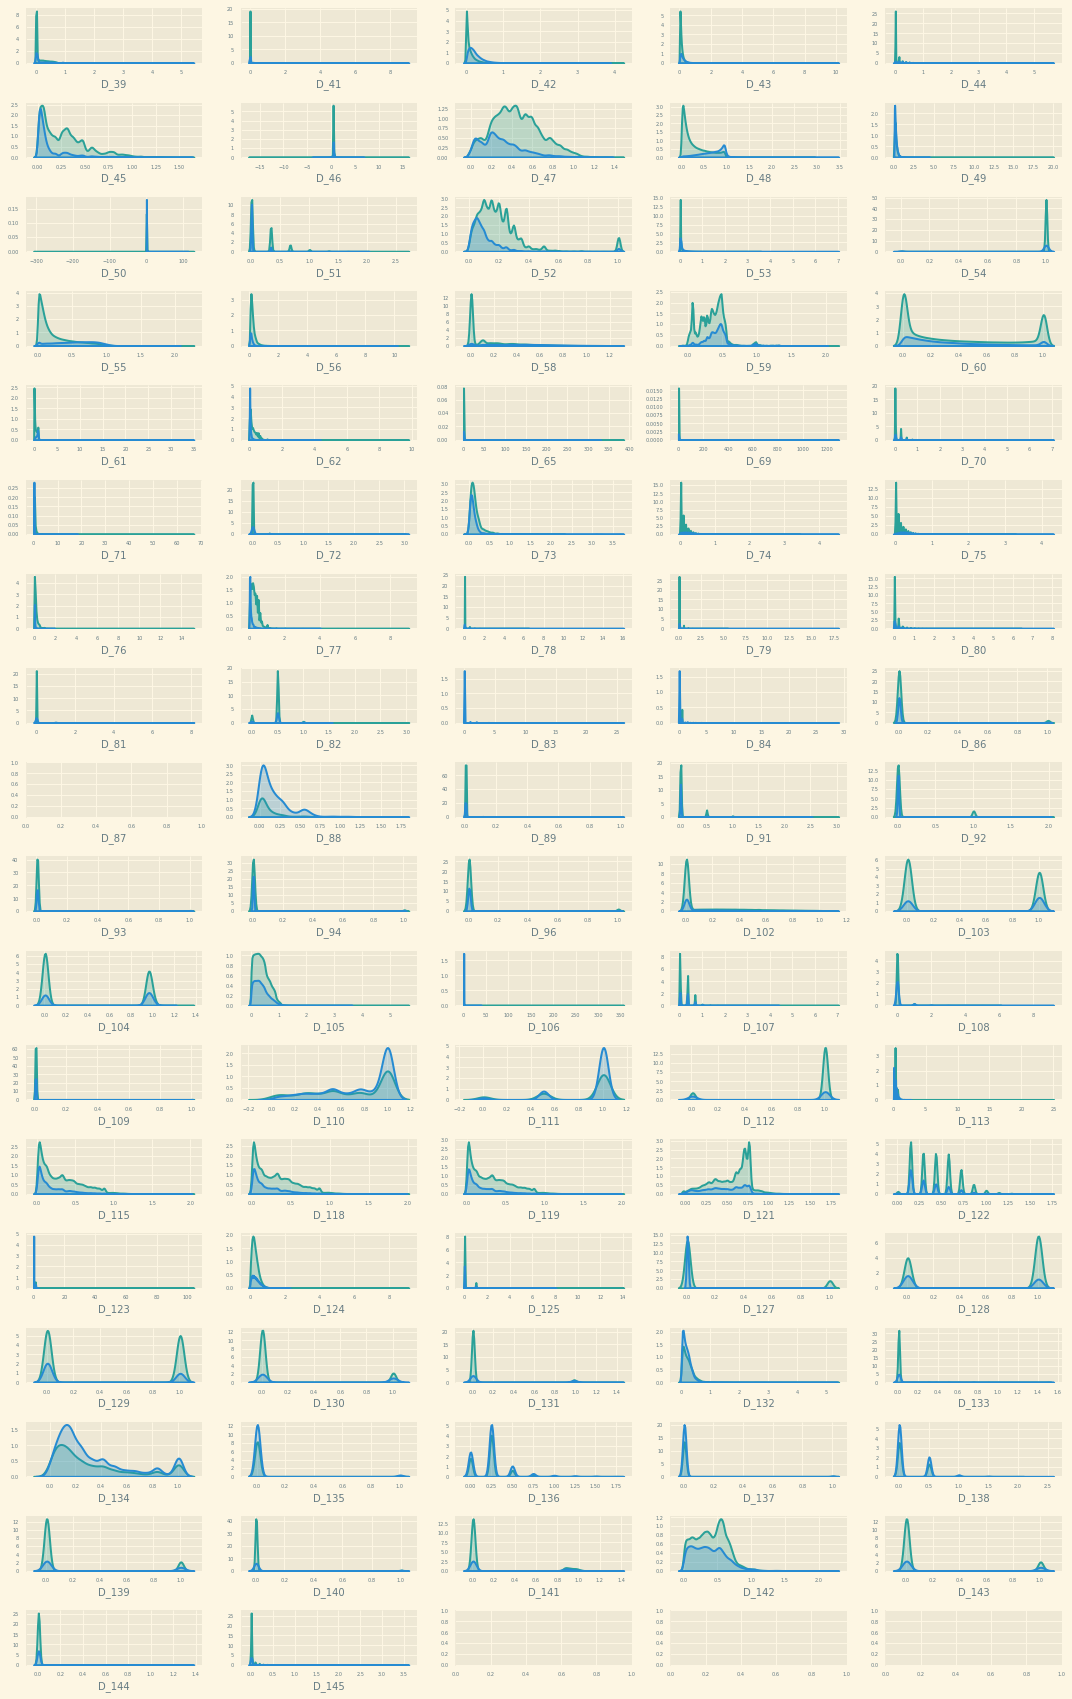

In [54]:
show_kdeplots('D', (15,30))

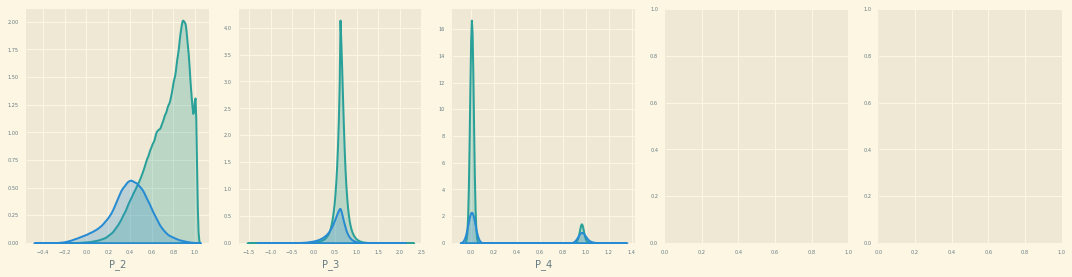

In [55]:
show_kdeplots('P', (15,5))

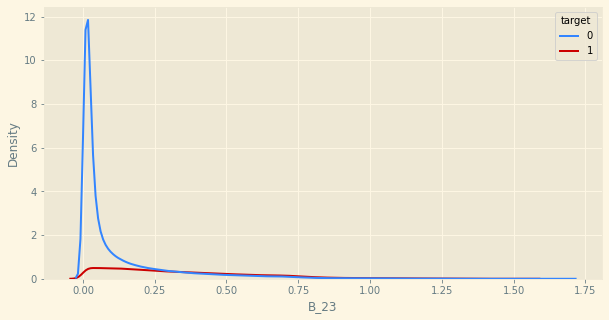

In [56]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(data=train, x='B_23', hue='target', palette=["#3385ff", "#cc0000"], ax=ax)
plt.show()

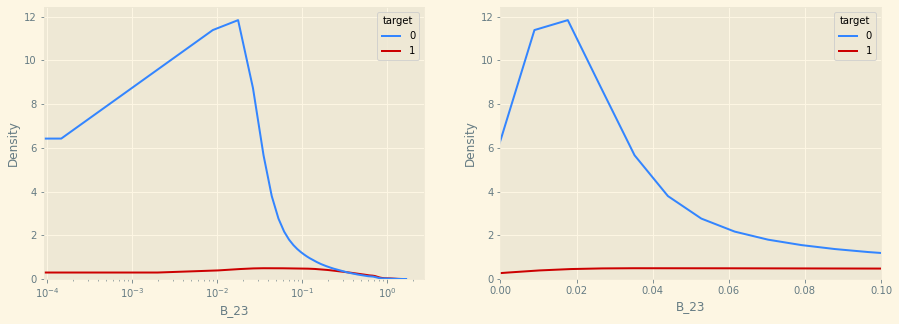

In [57]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=train, x='B_23', hue='target', palette=["#3385ff", "#cc0000"], ax=ax[0])
ax[0].set_xscale('log')
sns.kdeplot(data=train, x='B_23', hue='target', palette=["#3385ff", "#cc0000"], ax=ax[1])
ax[1].set_xlim([0,0.1])
plt.show()